In [37]:
# 希拉里 特朗普民调分析
# 导入模块
import numpy as np
import datetime
import matplotlib.pyplot as plt

In [10]:
# 1.导入外面文件需要的列
use_col_namelist = ['enddate', 'adjpoll_clinton' ,'adjpoll_trump', 'adjpoll_johnson']
filename = 'presidential_polls.csv'
# 读取第一行数据
with open(filename, 'r') as f:
    col_names = f.readline()[0:-1]
col_names_list = col_names.split(",")
col_index_list = [col_names_list.index(lis) for lis in use_col_namelist]
print(col_index_list)

[7, 17, 18, 19]


In [12]:
data_array = np.loadtxt(filename,
                       delimiter=',',
                       dtype='str',
                       usecols=col_index_list,
                       skiprows=1)

In [53]:
# 2、数据处理
#    2.1 处理日期，转换成yyyy-mm的形式
print(type(data_array[:,0]))
enddate_list = data_array[:,0].tolist() # 将矩阵转为列表
print(type(enddate_list))

<class 'numpy.ndarray'>
<class 'list'>


In [59]:
# 格式转化
month_list = [datetime.datetime.strptime(datestr,"%m/%d/%Y") for datestr in enddate_list]
# 构建一个年月形式的列表
month_list = ["%d-%02d"%(dateobj.year,dateobj.month) for dateobj in month_list]
print(month_list)

['31-2016', '30-2016', '30-2016', '24-2016', '25-2016', '25-2016', '31-2016', '30-2016', '27-2016', '31-2016', '31-2016', '27-2016', '23-2016', '30-2016', '26-2016', '26-2016', '24-2016', '24-2016', '28-2016', '25-2016', '17-2016', '28-2016', '28-2016', '26-2016', '28-2016', '26-2016', '28-2016', '31-2016', '30-2016', '25-2016', '24-2016', '30-2016', '30-2016', '30-2016', '30-2016', '30-2016', '23-2016', '24-2016', '24-2016', '30-2016', '26-2016', '30-2016', '26-2016', '18-2016', '22-2016', '24-2016', '25-2016', '30-2016', '30-2016', '31-2016', '24-2016', '30-2016', '29-2016', '30-2016', '31-2016', '26-2016', '30-2016', '21-2016', '31-2016', '20-2016', '22-2016', '27-2016', '24-2016', '26-2016', '26-2016', '26-2016', '28-2016', '26-2016', '23-2016', '27-2016', '26-2016', '23-2016', '31-2016', '31-2016', '22-2016', '26-2016', '31-2016', '31-2016', '31-2016', '31-2016', '30-2016', '25-2016', '31-2016', '24-2016', '26-2016', '31-2016', '26-2016', '31-2016', '16-2016', '31-2016', '31-2016'

In [30]:
#        2.1.2 对日期去重排序
month_array = np.array(month_list)
months = np.unique(month_array)
print(months)

['2015-11' '2015-12' '2016-01' '2016-02' '2016-03' '2016-04' '2016-05'
 '2016-06' '2016-07' '2016-08' '2016-09' '2016-10']


In [31]:
# 处理希拉里的民调数据
adjpoll_clienton_data = data_array[:,1]
# 对无效数据进行处理（缺失值）,三元操作符
adjpoll_clienton_data = np.where(adjpoll_clienton_data=="","0",adjpoll_clienton_data)
# 数据类型的转换
adjpoll_clienton_data = adjpoll_clienton_data.astype(np.float64)

In [33]:
# 处理特朗普的民调数据
adjpoll_trump_data = data_array[:,2]
# 对无效数据进行处理（缺失值）,三元操作符
adjpoll_trump_data = np.where(adjpoll_trump_data=="","0",adjpoll_trump_data)
# 数据类型的转换
adjpoll_trump_data = adjpoll_trump_data.astype(np.float64)

In [34]:
# 处理johnson的民调数据
adjpoll_johnson_data = data_array[:,3]
# 对无效数据进行处理（缺失值）,三元操作符
adjpoll_johnson_data = np.where(adjpoll_johnson_data=="","0",adjpoll_johnson_data)
# 数据类型的转换
adjpoll_johnson_data = adjpoll_johnson_data.astype(np.float64)

In [36]:
# 3、数据的分析
#按月统计民调数据
results = []
for month in months:
    # 假如 month='2015-12'
    # month_array: 未去重的月份的数组    
    # months ：去重之后的月份的数组
    bool_array = month_array == month
    # 当月希拉里的民调数据，用条件索引bool_array
    adjpoll_clienton_month_data = adjpoll_clienton_data[bool_array]
    # 计算希拉里当月民调的和
    adjpoll_clienton_month_sum = np.sum(adjpoll_clienton_month_data)
    # 当月特朗普的民调数据
    adjpoll_trump_month_data = adjpoll_trump_data[bool_array]
    adjpoll_trump_month_sum = np.sum(adjpoll_trump_month_data)
    # 当月johnson的民调数据
    adjpoll_johnson_month_data = adjpoll_johnson_data[bool_array]
    adjpoll_johnson_month_sum = np.sum(adjpoll_johnson_month_data)
    
    results.append([month,adjpoll_clienton_month_sum,adjpoll_trump_month_sum,adjpoll_johnson_month_sum])


In [38]:
# 4、用可视化的工具呈现数据分析的结果
arr = np.array(results)
print(arr)

[['2015-11' '1916.6980600000002' '1937.3290100000002' '0.0']
 ['2015-12' '4637.25688' '4088.9218999999994' '0.0']
 ['2016-01' '6585.167019999999' '6253.24935' '117.31799']
 ['2016-02' '7946.228610000001' '7672.3398' '119.92173']
 ['2016-03' '11156.09824' '9991.59358' '178.494817']
 ['2016-04' '11579.426780000002' '9884.156190000002' '245.17551000000003']
 ['2016-05' '12242.27538' '12069.761290000002' '649.7966207']
 ['2016-06' '19771.335759999998' '18154.90623' '1628.9801308']
 ['2016-07' '23233.111679999998' '22757.07327' '1714.212964']
 ['2016-08' '67909.28210000001' '66428.29714000001' '5571.0258837']
 ['2016-09' '102445.45295' '106065.00385000001' '8855.4758763']
 ['2016-10' '165319.59355' '164990.78638900002' '16963.8727275']]


In [39]:
months_ = arr[:,0]
clienton_data_ = arr[:,1].astype(np.float64)
trump_data_ = arr[:,2].astype(np.float64)
johnson_data_ = arr[:,3].astype(np.float64)
print(johnson_data_)

[    0.            0.          117.31799     119.92173     178.494817
   245.17551     649.7966207  1628.9801308  1714.212964   5571.0258837
  8855.4758763 16963.8727275]


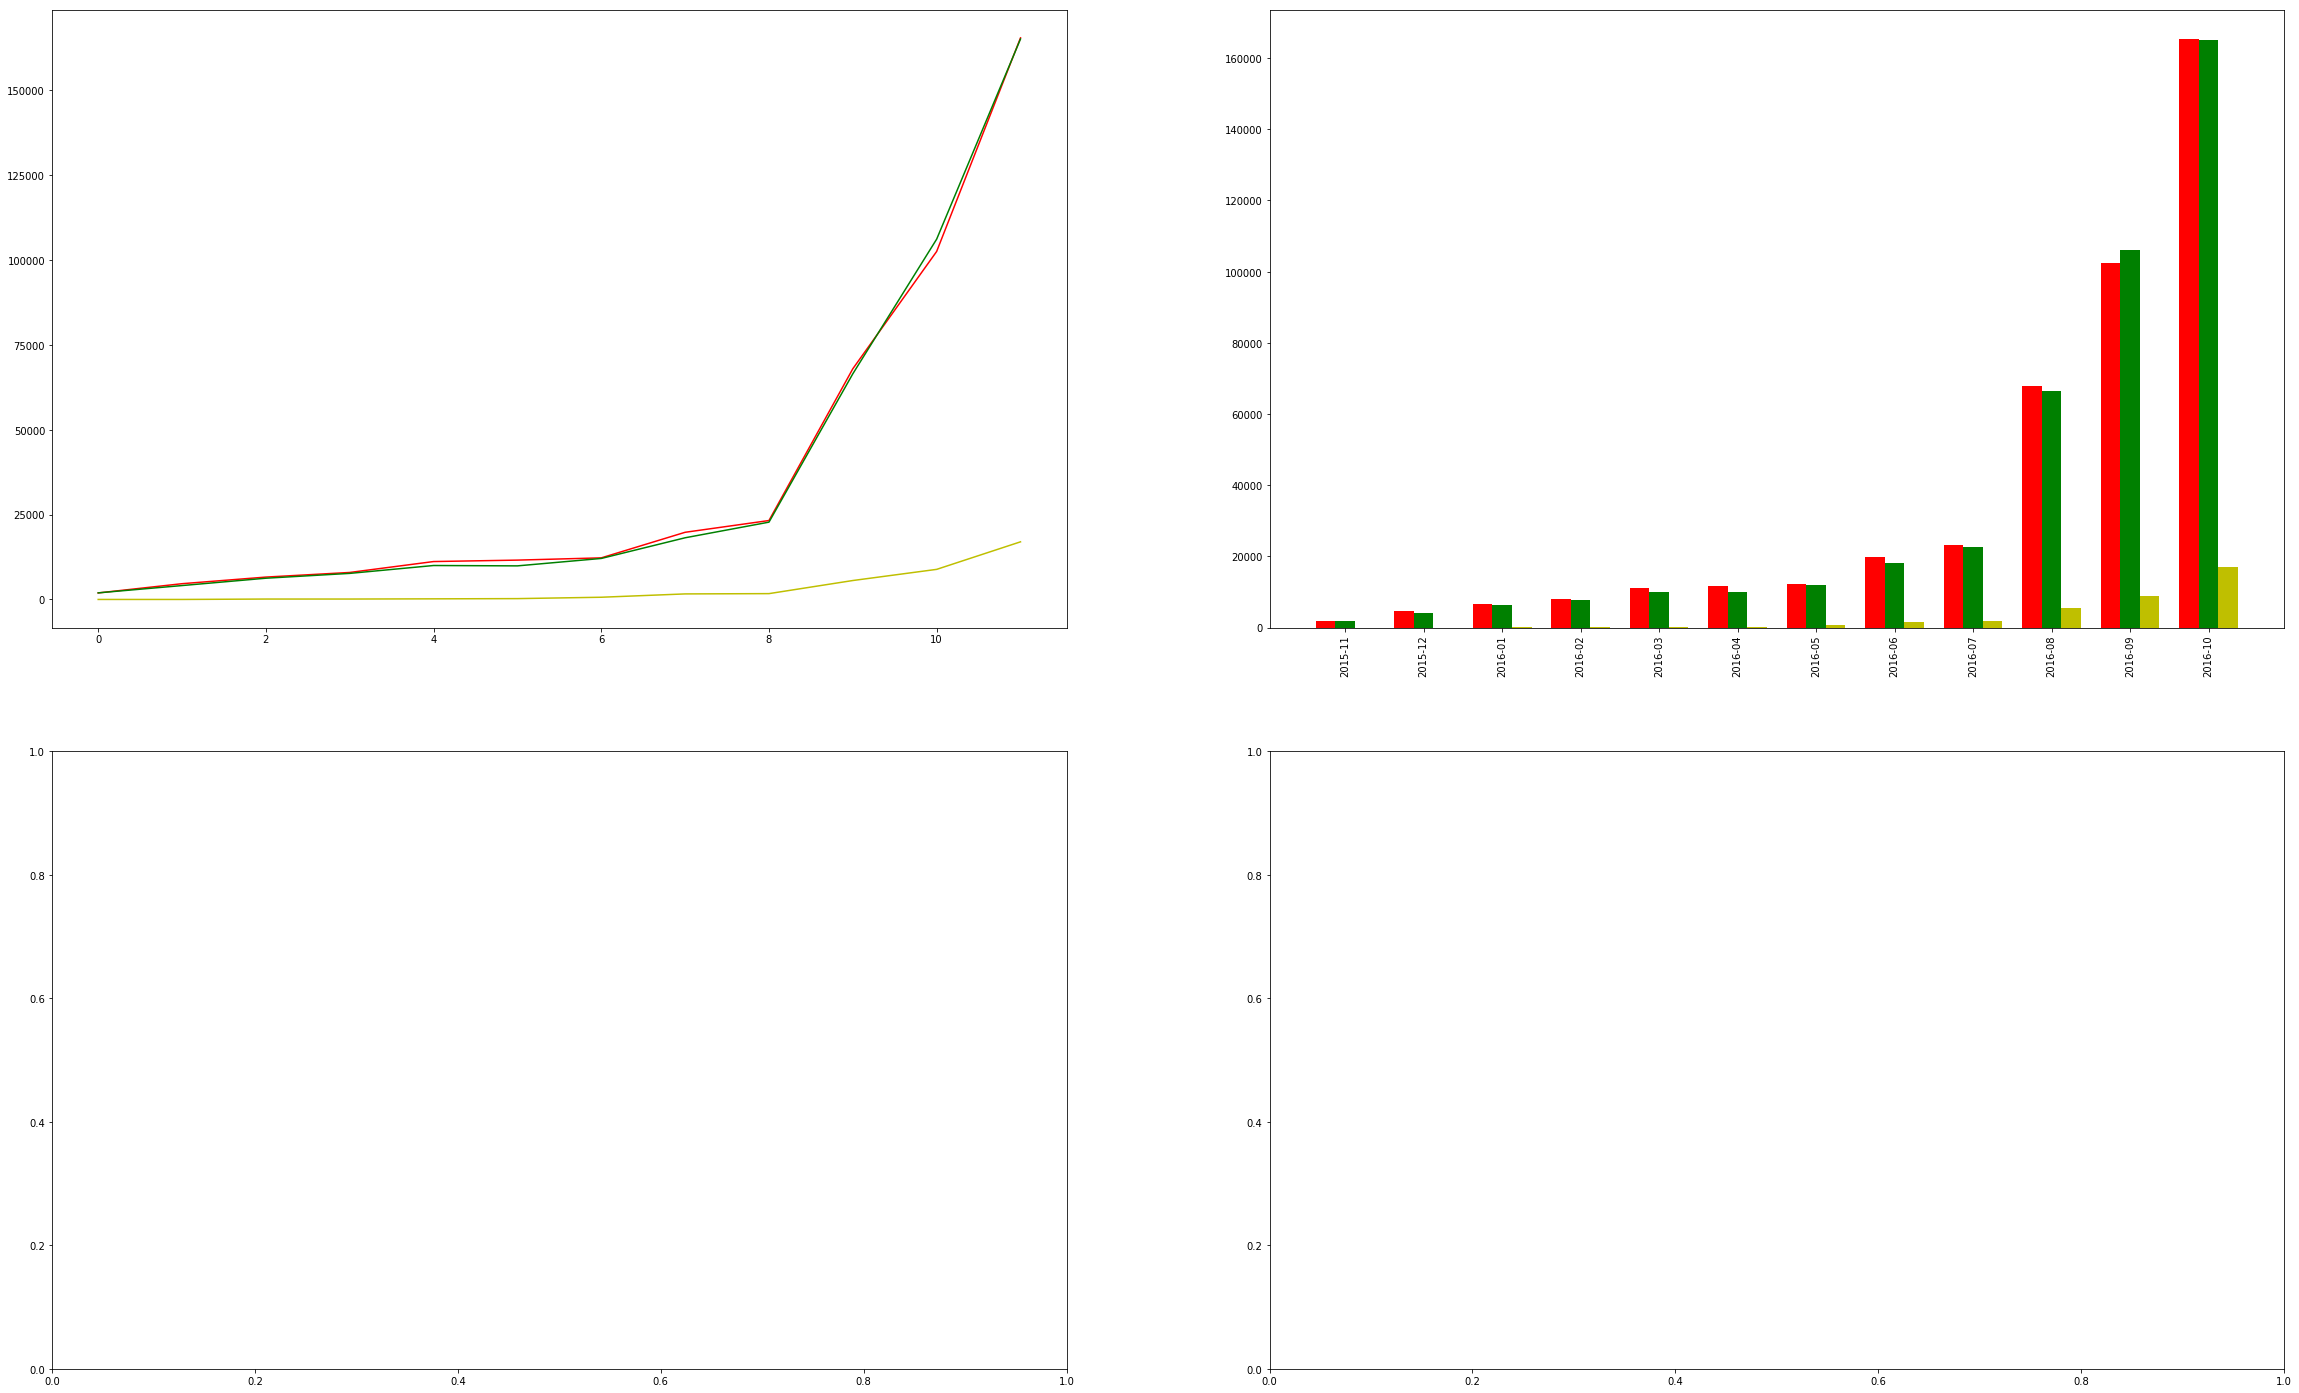

In [50]:
fig, subplots_arr = plt.subplots(2,2,figsize=(40,25))
# 折线图展示选情走势
subplots_arr[0,0].plot(clienton_data_, color='r')
subplots_arr[0,0].plot(trump_data_, color='g')
subplots_arr[0,0].plot(johnson_data_, color='y')
# 柱形图展示
x = np.arange(len(months))
width = 0.25
subplots_arr[0,1].bar(x, clienton_data_, width, color='r')
subplots_arr[0,1].bar(x+width, trump_data_, width, color='g')
subplots_arr[0,1].bar(x+2*width, johnson_data_, width, color='y')
subplots_arr[0,1].set_xticks(x+width)
subplots_arr[0,1].set_xticklabels(months, rotation='vertical')
plt.savefig('mindiao.png')
plt.show()